Melhor indivíduo: [4, 3, 1, 10, 9, 8, 2, 7, 6, 5] - distância: 6.5757)


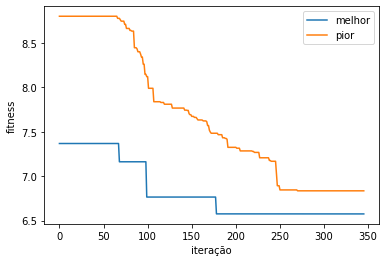

In [1]:
#Importação das bibliotecas

import random
import math
import heapq

import numpy as np
import matplotlib.pyplot as plt


# Um vértice é o caminho entre duas cidade, representada por um número. 
#Além disso, tem um coordenada X e Y (Que neste trabalho foi utilizada  Longitude e Latitude) para calcular a distância.

class Vertice:

    def __init__(self, numero, coordX, coordY):
        self.numero = numero
        self.coordX = coordX
        self.coordY = coordY

#Lista das cidade percorridas durante as rotas
listaVertice = [
    # Vitoria
    Vertice(1, -20.3196644, -40.3384748),
    # Aracruz
    Vertice(2, -19.8244299, -40.2670486),
    # Linhares
    Vertice(3, -19.3990502, -40.0653505),
    # São Mateus
    Vertice(4, -18.7164958, -39.8556519),
    # Nova Venécia
    Vertice(5, -18.7083664, -40.3953552),
    # São Gabriel da Palha
    Vertice(6, -19.0182613, -40.5372213),
    # Colatina
    Vertice(7, -19.5368995, -40.6307885),
    # Alegre
    Vertice(8, -20.7626116, -41.5315855),
    # Cachoeiro de Itapemerim
    Vertice(9, -20.8517991, -41.1148627),
    # Guarapari
    Vertice(10, -20.6738927, -40.4999838),
]

tamanhoDaListaDeVertices = len(listaVertice)


class Cromossomo:

    # O caminho é o conjunto de genes. E cada gene é uma cidade/vértice.
    caminho = []
    valorFitness = -1

    # Método de comparação rica, ao fazer x < y ele chama esse método.
    def __lt__(self, other):
        return self.calculaFitness() < other.calculaFitness()

    # ATENÇÃO: Nesse caso o MENOR valor é o melhor fitness, POIS ESTA SENDO CALCULADA A DISTÂNCIA.
    def calculaFitness(self):
        global listaVertice
        global tamanhoDaListaDeVertices

        if(self.valorFitness == -1):
            soma = 0
            for x in range(tamanhoDaListaDeVertices - 1):
                # Menos um porque volta pra origem.
                verticeUmDaVez = listaVertice[self.caminho[x] - 1]
                # Menos um porque volta pra origem.
                verticeDoisDaVez = listaVertice[self.caminho[x+1] - 1]
                soma += math.sqrt(((verticeUmDaVez.coordX - verticeDoisDaVez.coordX) ** 2) + (
                    (verticeUmDaVez.coordY - verticeDoisDaVez.coordY) ** 2))

            verticeUmDaVezVoltandoAOrigem = listaVertice[self.caminho[0] - 1]
            verticeDoisDaVezVoltandoAOrigem = listaVertice[self.caminho[tamanhoDaListaDeVertices - 1] - 1]
            soma += math.sqrt(((verticeUmDaVezVoltandoAOrigem.coordX - verticeDoisDaVezVoltandoAOrigem.coordX)
                              ** 2) + ((verticeUmDaVezVoltandoAOrigem.coordY - verticeDoisDaVezVoltandoAOrigem.coordY) ** 2))

            self.valorFitness = round(soma, 4)

        return self.valorFitness


inicializadorDaPopulacao = []

# Cria um vetor de 1 até a quantidade de vértices/cidades.
for x in range(1, tamanhoDaListaDeVertices + 1):
    inicializadorDaPopulacao.append(x)


populacao = []
tamanhoDaPopulacao = 200

#Método cria os cromossomos iniciais. Para cada indivíduo adiciona no caminho (individuo) as cidades(genes).
#Depois embaralha essas cidades, gerando individuos diferentes e por  último coloca na população. Faz isso até o número máximo de individuos.

def geraPopulacao():
    global populacao

    for x in range(tamanhoDaPopulacao):
        cromossomo = Cromossomo()
        cromossomo.caminho = inicializadorDaPopulacao[:]
        # Embaralha a ordem dos valores.
        random.shuffle(cromossomo.caminho)  
        # Adiciono o cromossomo(indivíduo) na pilha
        heapq.heappush(populacao, cromossomo)
    return populacao

#METODO TORNEIO: Seleciona um número K de indivíduos randomicamente e depois pega os dois de melhor fitness para fazer o cruzamento e gerar um filho.
def selecaoIndividuo(parametroPopulacao):
    # Pega a primeira parte do vetor população. O // para arredondar o valor resultante da divisão.
    valorRandomUm = random.randrange(tamanhoDaPopulacao//2)
    # Pega a segunda parte da população(vetor).
    valorRandomDois = random.randrange(
        tamanhoDaPopulacao//2, tamanhoDaPopulacao)

    #valorRandomTrês = random.randrange(tamanhoDaPopulacao//2, tamanhoDaPopulacao)
    #valorRandomQuatro = random.randrange(tamanhoDaPopulacao//2, tamanhoDaPopulacao)

    if parametroPopulacao[valorRandomUm].calculaFitness() < parametroPopulacao[valorRandomDois].calculaFitness():
        return parametroPopulacao[valorRandomUm]
    else:
        return parametroPopulacao[valorRandomDois]

#ATENÇÂO: A partir do primeiro pai pega-se uma parte do vetor(parte do gene) e coloca diretamente no filho.
#Depois pegue um segmento do segundo pai e coloco apenas os números que ainda não estão no filho e se faltar veja quais faltam.
#Pai 1 -> 012|3456|789  : Filho -> 281|3456|970. 
#Pai 2 -> 970|2814|356  :

def crossoverIndividuo(individuoUm, individuoDois):
    global tamanhoDaPopulacao
    global tamanhoDaListaDeVertices

    listaNovosIndividuos = []
    contador = 0

    qtdGeracao = 5  # Número de interações.
    tamanhoCorte = int(tamanhoDaListaDeVertices * 0.6)  # 3

#Lógica utilizada para definir tentativas e testes
#Serão utilizadas as seguintes opções 
#posicaoCorteUm = random.randrange(0, (tamanhoDaPopulacao - 1) // 2)  # Primeira parte
#posicaoCorteDois = random.randrange(((tamanhoDaPopulacao - 1) // 2) + 1, tamanhoDaPopulacao - 1)  # segunda parte
#tamanhoCorte = (posicaoCorteDois - posicaoCorteUm)"""

    while contador < qtdGeracao:
        qtdGenesAdicionados = 0
        # Pega de 0 até o tamanhoCorte
        geneDosPaisParaFilho = individuoUm.caminho[:tamanhoCorte]

        # Vai adicionar os valores do segundo pai que n estão no filho ainda.
        for x in individuoDois.caminho:
            if (qtdGenesAdicionados == (tamanhoDaListaDeVertices - tamanhoCorte)):
                break
            if x not in geneDosPaisParaFilho:
                geneDosPaisParaFilho.append(x)
                qtdGenesAdicionados += 1

#Atenção: Poderia  tcolocar a mutação separado, MAS DEVERIA que fazer ela para todos os indivíduos da lista de curzamento.
        geneDosPaisParaFilho = mutacaoIndividuo(
            geneDosPaisParaFilho) 
        # Mutação pra que gere indivíduos diferentes e mantenha a diversidade

        novoIndividuo = Cromossomo()
        novoIndividuo.caminho = geneDosPaisParaFilho

        listaNovosIndividuos.append(novoIndividuo)

        contador += 1

    return listaNovosIndividuos

#Atenção: utilização do método  SWAP MUTATION: Escolhemos dois genes de um cromossomo e trocamos eles de lugares.
#exemplo: 1"2"345"6"78 -> 1"6"345"2"789 (como pode ser observado o seis trocou de lugar)

def mutacaoIndividuo(caminhoDoNovoFilhoGerado):

    geneUm = random.randrange(tamanhoDaListaDeVertices - 1)
    geneDois = random.randrange(geneUm, tamanhoDaListaDeVertices - 1)

    caminhoDoNovoFilhoGerado[geneUm], caminhoDoNovoFilhoGerado[
        geneDois] = caminhoDoNovoFilhoGerado[geneDois], caminhoDoNovoFilhoGerado[geneUm]

    return caminhoDoNovoFilhoGerado


melhorSolucao = True
numeroTentativas = 0

#Atenção: Utilização do ELITISMO: Pega os melhores indivíduos da nova lista e coloca no lugar dos piores da população.


def atualizaPopulacao(parametroPopulacao, parametroListaDeNovosIndividuos):
    global melhorSolucao
    global numeroTentativas

    for x in parametroListaDeNovosIndividuos:
        # pego o pior fitness, nesse caso o maior.
        individuoMaiorFitness = heapq.nlargest(1, parametroPopulacao)[0]
        menor = parametroPopulacao[0]

        xFitness = x.calculaFitness()
        if(xFitness < individuoMaiorFitness.calculaFitness()):
            parametroPopulacao.remove(individuoMaiorFitness)
            heapq.heappush(parametroPopulacao, x)
            heapq.heapify(parametroPopulacao)

            if xFitness < menor.calculaFitness():
                # Controla o número de vezes q o algoritmo vai rodar. Se eu ficar gerendo filhos piores ele para.
                numeroTentativas = 0
            else:
                numeroTentativas += 1
        else:
            numeroTentativas += 1

        if numeroTentativas == 700:
            melhorSolucao = False

    return parametroPopulacao


def obtemMenor(parametroPopulacao):
    return parametroPopulacao[0]

def obtemMMaior(parametroPopulacao):
    return parametroPopulacao[tamanhoDaListaDeVertices - 1]

#---------------------------- ALGORITMO DE AG PROPRIAMENTE DITO ------------------------------------#


# População é inicializada
populacao = geraPopulacao()
best = []
bad = []

# imprime população inicial
# for i in range(len(populacao)):
#     print("Individuo: {}".format(populacao[i].caminho))
#     # print("indivíduo: {} | fitness : {}".format(
#     #     populacao[i].caminho, populacao[i].caminho.calculaFitness()))

while(melhorSolucao):

    # Avalio os indivíduos e realiza a seleção.
    individuoUm = selecaoIndividuo(populacao)
    individuoDois = selecaoIndividuo(populacao)

    # Cruzamentos entre os individuos escolhidos. E no mesmo método realiza a mutação do filho gerado
    # No método crossover e gerada uma lista de novos indivíduos.
    novosIndividuosGerados = crossoverIndividuo(individuoUm, individuoDois)

    # É realizado a avaliação do novo indivíduo e se valer a pena o mesmo adicionado na população.
    populacao = atualizaPopulacao(populacao, novosIndividuosGerados)
    best = np.append(best, obtemMenor(populacao).calculaFitness())
    bad = np.append(bad, obtemMMaior(populacao).calculaFitness())


# Imprime todos os indivíduos da ultima geração
# aux = 1
# for x in populacao:
#     print(aux, " indivíduo:", x.caminho, " | Fitness:", x.calculaFitness())
#     aux = aux + 1
#IMPRIME A MELHOR SOLUÇÃO ENCONTRADA  (DISTANCIA)

print("Melhor indivíduo: {} - distância: {})".format(obtemMenor(populacao).caminho,
      obtemMenor(populacao).calculaFitness()))


# cria figura e box
fig, ax = plt.subplots()  
# plota as curvas de desempenho
ax.plot(best, label='melhor')
# ax.plot(average_fitness, label='médio')
ax.plot(bad, label='pior')
# configuração legenda
ax.set_xlabel('iteração')
ax.set_ylabel('fitness')
ax.legend() 
# exibe imagem
plt.show()